> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# **IS 4487 LAB 6 - DATA PREPARATION I: CLEANING AND VALIDATING**

## Outline

- Load and inspect a new dataset (Megatelco)
- Fix column names: cleaning string variables
- Fix data types
- Handle missing values using multiple techniques
- Remove duplicate rows
- Review and remove outliers using multiple techniques
- Reflect on data quality

In this lab, we’ll clean the data to get it ready for transformations and analysis.

We will continue working with this dataset in **Lab 7**, where we will create new features and apply transformations.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Context: Churn at a telecom company

MegaTelCo is one of the largest telecommunication firms in the United States. They are having a major problem with customer retention in their wireless business. In the mid-Atlantic region, 20% of cell phone customers leave when their contracts expire, and it is getting increasingly difficult to acquire new customers. Since the cell phone market is now saturated, the huge growth in the wireless market has tapered off.

Communications companies are now engaged in battles to attract each other's customers while retaining their own. Customers switching from one company to another is called churn, and it is expensive all around: one company must spend on incentives to attract a customer while another company loses revenue when the customer departs. We have been called in to help understand the problem and to devise a solution.

Source: Provost, Foster, Fawcett, Tom. (2013). Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking . Sebastopol, California: O\'Reilly.

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/megatelco_leave_survey_data_cleaning.csv"
df = pd.read_csv(url)

df.head()

,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,operating_system
0,one,403137.0,70,0.0,6605.0,199,841317,653.0,5.0,8.0,low,low,yes,LEAVE,8183,Android
1,zero,129700.0,67,16.0,6028.0,134,476664,1193.0,5.0,5.0,low,low,yes,LEAVE,12501,IOS
2,zero,69741.0,60,0.0,1482.0,176,810225,1037.0,3.0,8.0,low,low,yes,STAY,7425,IOS
3,one,377572.0,0,22.0,3005.0,184,826967,1161.0,0.0,5.0,low,low,no,LEAVE,13488,IOS
4,zero,382080.0,0,0.0,1794.0,74,951896,1023.0,0.0,14.0,low,low,yes,STAY,11389,IOS


In [ ]:
# create a copy of your dataset for use in part 4
copied_df = df.copy(deep=True)

## **Part 1: Review Column Names and Structure**

Before cleaning, check the structure of the dataset:

- Check the shape
- Are column names good?
    - consistent (lowercase, no spaces)?
    - any typos or redundant labels?


Why this matters:
Inconsistent or messy column names can break code and make analysis harder to follow.




In [44]:
# rows and columns
print(df.shape)

# Get column info and data types
df.info()

# Standardize column names: lowercase, no spaces
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")



(15016, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      15016 non-null  object 
 1   income                       15006 non-null  float64
 2   data_overage_mb              15016 non-null  int64  
 3   data_leftover_mb             14916 non-null  float64
 4   data_mb_used                 14916 non-null  float64
 5   text_message_count           15016 non-null  int64  
 6   house                        15016 non-null  int64  
 7   handset_price                14916 non-null  float64
 8   over_15mins_calls_per_month  15013 non-null  float64
 9   average_call_duration        14916 non-null  float64
 10  reported_satisfaction        15016 non-null  object 
 11  reported_usage_level         15016 non-null  object 
 12  considering_change_of_plan   14201 non-null  object 
 13  leav

## **Part 2: Convert Data Types**

Before analysis, make sure each column is stored in the correct format. This helps avoid calculation errors, makes plotting smoother, and ensures models interpret the data correctly.

Think about:
- Are numbers accidentally stored as strings?
- Should repeated text values be converted to categories?
- Are "yes"/"no" columns better represented as binary (0/1) or categorical types?

Fixing data types now saves time and avoids issues later in your workflow.




In [45]:
# Check original data types
print("Original dtypes:\n", df.dtypes)

# Convert yes/no to binary categories
df['considering_change_of_plan'] = df['considering_change_of_plan'].map({'yes': 1, 'no': 0}).astype('category')

# Convert object/text columns with limited possible values with an order to ordinal categorical columnns
obj_to_cat_cols = ['reported_satisfaction', 'reported_usage_level']
for each in obj_to_float_cols:
    df[each] = pd.Categorical(df[each], categories = ['Low', 'Medium', 'High'], ordered = True)

#df['college'] = df['college'].astype('category')
#df['reported_satisfaction'] = df['reported_satisfaction'].astype('category')
#df['operating_system'] = df['operating_system'].astype('category')
#df['reported_usage_level'] = df['reported_usage_level'].astype('category')

# Convert numeric-looking columns from object to float
#df['income'] = pd.to_numeric(df['income'], errors='coerce')
#df['data_overage_mb'] = pd.to_numeric(df['data_overage_mb'], errors='coerce')
#df['data_leftover_mb'] = pd.to_numeric(df['data_leftover_mb'], errors='coerce')
#df['data_mb_used'] = pd.to_numeric(df['data_mb_used'], errors='coerce')
#df['text_message_count'] = pd.to_numeric(df['text_message_count'], errors='coerce')
#df['over_15mins_calls_per_month'] = pd.to_numeric(df['over_15mins_calls_per_month'], errors='coerce')
#df['average_call_duration'] = pd.to_numeric(df['average_call_duration'], errors='coerce')

obj_to_float_cols = ['income', 'data_overage_mb', 'data_leftover_mb', 'data_mb_used', 'text_message_count', 'over_15mins_calls_per_month', 'average_call_duration']
for each in obj_to_float_cols:
    df[each] = pd.to_numeric(df[each], errors='coerce')


# Check updated data types
print("\nUpdated dtypes:\n", df.dtypes)


Original dtypes:
 college                         object
income                         float64
data_overage_mb                  int64
data_leftover_mb               float64
data_mb_used                   float64
text_message_count               int64
house                            int64
handset_price                  float64
over_15mins_calls_per_month    float64
average_call_duration          float64
reported_satisfaction           object
reported_usage_level            object
considering_change_of_plan      object
leave                           object
id                               int64
operating_system                object
dtype: object


NameError: name 'obj_to_float_cols' is not defined

### **🔧 Try It Yourself – Part 2**

1. Convert the `leave` column from "yes"/"no" to binary (`1`/`0`) and make it a **category**
2. Convert `reported_usage_level` to a **categorical** type
3. Use `.astype()` and `.info()` to confirm the changes


In [46]:
# add code here 🔧
#1
df['leave'] = df['leave'].map({'LEAVE': 1, 'STAY': 0}).astype('category')

#2
df['reported_usage_level'] = df['reported_usage_level'].astype('category')

#3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      15016 non-null  object  
 1   income                       15006 non-null  float64 
 2   data_overage_mb              15016 non-null  int64   
 3   data_leftover_mb             14916 non-null  float64 
 4   data_mb_used                 14916 non-null  float64 
 5   text_message_count           15016 non-null  int64   
 6   house                        15016 non-null  int64   
 7   handset_price                14916 non-null  float64 
 8   over_15mins_calls_per_month  15013 non-null  float64 
 9   average_call_duration        14916 non-null  float64 
 10  reported_satisfaction        15016 non-null  object  
 11  reported_usage_level         15016 non-null  category
 12  considering_change_of_plan   14201 non-null  category
 13  l

## Part 3: Handle Missing Values

Missing data can break charts, skew stats, and disrupt models — so it needs to be handled carefully.

### Think about:
- Are the missing values random or patterned?
- Can we drop rows, or do we need to fill them?
- Should we use mean, median, or something else?

### Guidelines:
- Drop rows only if few are missing and the column is essential.
- Use **median** for numeric columns with outliers.
- Use **0** if missing logically means "none" (e.g., no leftover data).
- Use **mode** for categorical values.

Cleaning missing values early avoids bigger problems later.

-----


### A Note on `.loc` and Warnings

When assigning values to a DataFrame, especially after filtering or copying, it's best to use `.loc` to avoid **`SettingWithCopyWarning`**. This ensures that you're updating the original data and not a temporary view of it.


In [51]:
# View missing value counts
print("Missing values per column:\n", df.isnull().sum())

# Fill 'handset_price' with median
df['handset_price'] = df['handset_price'].fillna(df['handset_price'].median())

# Drop rows with missing 'income' (if very few)
df = df.dropna(subset=['income']).copy()

# Fill missing 'data_leftover_mb' with 0 if it logically means no leftover data
df.loc[:, 'data_leftover_mb'] = df['data_leftover_mb'].fillna(0)

# Fill 'average_call_duration' with median if necessary
df.loc[:, 'average_call_duration'] = df['average_call_duration'].fillna(df['average_call_duration'].median())

# Fill 'data_mb_used' with median
df.loc[:, 'data_mb_used'] = df['data_mb_used'].fillna(df['data_mb_used'].median())

# Confirm updated missing values
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values per column:
 college                         0
income                          9
data_overage_mb                 0
data_leftover_mb               97
data_mb_used                   96
text_message_count              0
house                           0
handset_price                  98
over_15mins_calls_per_month     0
average_call_duration          94
reported_satisfaction           0
reported_usage_level            0
considering_change_of_plan      0
leave                           0
id                              0
operating_system                0
dtype: int64

Missing values after handling:
 college                        0
income                         0
data_overage_mb                0
data_leftover_mb               0
data_mb_used                   0
text_message_count             0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          0
reported_usage_leve

### 🔧 Try It Yourself – Part 3


There are still some missing values in:

- `over_15mins_calls_per_month`
- `considering_change_of_plan`

Decide how to handle them based on what makes the most sense:

- Should you fill them with 0, the median, or something else?
- For categories, would a placeholder like "unknown" or the most common value work?
- Or is it better to drop those rows?

1. Write and execute code to handle the missing values in the remaining two columns.
2. Use `df.isnull().sum()` to confirm all missing values are handled.



In [ ]:
# Add code here 🔧

In [52]:
df.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,14192.000000,14192.000000,14192.000000,14192.000000,14192.000000,1.419200e+04,14192.000000,14192.000000,14192.000000,14192.000000
mean,241994.731539,153.292841,37.275719,4199.708286,135.980834,8.778392e+05,796.485062,10.562641,10.061795,11868.728439
std,109627.057684,113.147783,28.158838,2196.291701,63.620079,2.868384e+05,1267.739510,8.407636,42.207205,6820.155082
min,-65000.000000,0.000000,0.000000,400.000000,52.000000,-4.630000e+02,215.000000,0.000000,1.000000,2.000000
25%,147825.500000,54.000000,12.000000,2304.000000,93.000000,6.450782e+05,500.000000,3.000000,5.000000,6135.000000
50%,241683.000000,150.000000,34.000000,4217.500000,135.000000,8.770250e+05,778.000000,9.000000,10.000000,11775.000000
75%,336537.000000,242.000000,62.000000,6063.000000,178.000000,1.099011e+06,1063.000000,17.000000,14.000000,17387.500000
max,432000.000000,380.000000,89.000000,8000.000000,5000.000000,1.456389e+06,125000.000000,35.000000,5000.000000,25354.000000


In [53]:
#1.
df['over_15mins_calls_per_month'] = df['over_15mins_calls_per_month'].fillna(df['over_15mins_calls_per_month'].median())

In [54]:
#1.
df = df.dropna(subset=['considering_change_of_plan']).copy()

In [55]:
#2.
df.isnull().sum()

,0
college,0
income,0
data_overage_mb,0
data_leftover_mb,0
data_mb_used,0
text_message_count,0
house,0
handset_price,0
over_15mins_calls_per_month,0
average_call_duration,0


## Part 4: Remove Duplicate Rows

Sometimes the same row appears more than once due to data entry or processing mistakes. It's important to check for and remove these duplicates.

Think about:
- Are there rows that are exactly the same?
- If duplicates exist, should you keep the first one, the last one, or none?

Why this matters:
Duplicate rows can inflate totals, distort statistics, and lead to inaccurate conclusions.


In [ ]:
# Check for exact duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove them, keeping the first occurrence
df = df.drop_duplicates()

# Confirm result
print(f"Remaining rows after removing duplicates: {len(df)}")

### 🔧 Try It Yourself – Part 4

1. Use `copied_df.duplicated().sum()` to count how many duplicates are in your dataset.
2. Try using `copied_df.drop_duplicates(keep='last')` instead — what changes?
3. Explore whether duplicate rows share the same ID or just values across all columns and comment on your observation.


In [58]:
#1
print(f"Number of duplicate rows: {copied_df.duplicated().sum()}")

Number of duplicate rows: 0


In [57]:
#2
copied_df = copied_df.drop_duplicates(keep='last')

In [61]:
#3
# Check for duplicates across all columns except 'id'
duplicates_except_id = copied_df[copied_df.duplicated(subset=copied_df.columns.difference(['id']), keep=False)]

# Check if any of these duplicates share the same 'id'
duplicates_with_same_id = duplicates_except_id[duplicates_except_id.duplicated(subset=['id'], keep=False)]

print(f"Number of duplicate rows (excluding ID): {len(duplicates_except_id)}")
print(f"Number of duplicate rows with the same ID: {len(duplicates_with_same_id)}")

Number of duplicate rows (excluding ID): 0
Number of duplicate rows with the same ID: 0


🔧 Add comment here:

I see that all of the duplicates and rows with the same ID have gone away with my code.

## Part 5: Identify and Remove Obvious Outliers

Outliers are values that fall far outside the normal range. They can come from data entry mistakes or rare cases.

- Use summary statistics or visual tools (like boxplots) to find them.
- Look for clearly unrealistic values — e.g., negative prices or extremely high data usage.
- Decide how to handle them:
  - Remove if they’re errors.
  - Keep if they’re valid but rare — or cap them if needed.

Outliers can distort averages, stretch visualizations, and mislead models, so it’s important to address them carefully.



In [62]:
# Remove negative or nonsensical values using business rules

# Example: remove rows where 'handset_price' is negative
df = df[df['handset_price'] >= 0]

# Example: remove rows with unusually long call durations
df = df[df['average_call_duration'] < 1000]

# Example: remove rows with extremely high text message counts
df = df[df['text_message_count'] < 1000]

# View shape after outlier filtering
print("Shape after removing obvious outliers:", df.shape)


Shape after removing obvious outliers: (14190, 16)


### 🔧 Try It Yourself – Part 5

1. Use `df.describe()` to look for columns with extreme minimum or maximum values.
2. Set a threshold for what you think is "too high" for:
  - `data_mb_used`
  - `over_15mins_calls_per_month`
3. Remove those outliers using boolean filtering like `df = df[df['column'] < threshold]`

In [66]:
# 🔧 add code here:
import seaborn as sns

In [77]:
#3
df=df[df['data_mb_used'] < 7000]

In [78]:
#3
df=df[df['over_15mins_calls_per_month'] < 20]

<Axes: xlabel='data_mb_used', ylabel='Count'>

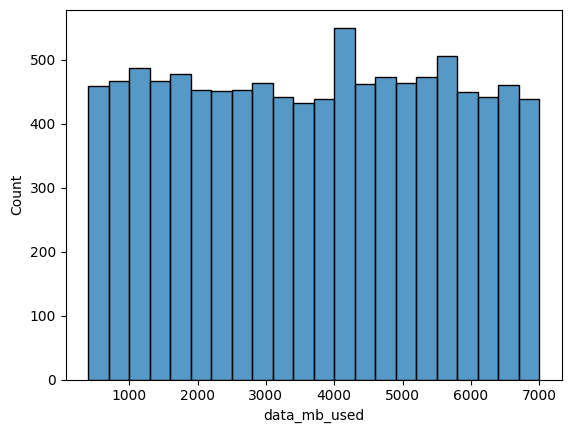

In [79]:
sns.histplot(x=df['data_mb_used'])


<Axes: xlabel='over_15mins_calls_per_month', ylabel='Count'>

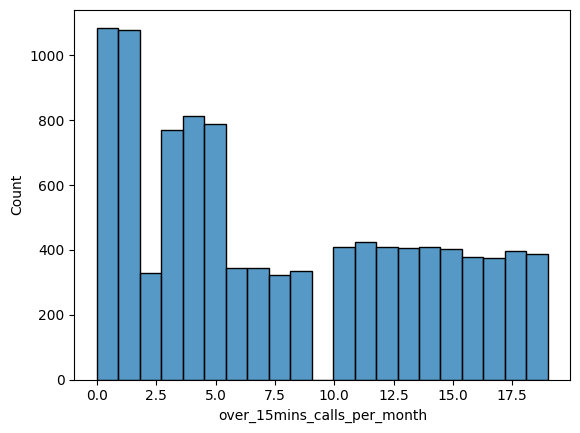

In [80]:
sns.histplot(x=df['over_15mins_calls_per_month'])

In [63]:
df.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,14190.000000,14190.000000,14190.000000,14190.000000,14190.000000,1.419000e+04,14190.000000,14190.000000,14190.000000,14190.000000
mean,242000.081466,153.281748,37.276533,4199.784355,135.638055,8.778060e+05,796.427484,10.562297,9.710148,11869.458280
std,109631.120149,113.148758,28.159687,2196.201299,48.791099,2.868449e+05,1267.819401,8.407500,5.170249,6819.993089
min,-65000.000000,0.000000,0.000000,400.000000,52.000000,-4.630000e+02,215.000000,0.000000,1.000000,2.000000
25%,147832.750000,54.000000,12.000000,2304.000000,93.000000,6.450508e+05,500.000000,3.000000,5.000000,6137.000000
50%,241683.000000,150.000000,34.000000,4217.500000,135.000000,8.769560e+05,778.000000,9.000000,10.000000,11775.000000
75%,336551.000000,242.000000,62.000000,6062.750000,178.000000,1.098856e+06,1062.750000,17.000000,14.000000,17388.500000
max,432000.000000,380.000000,89.000000,8000.000000,220.000000,1.456389e+06,125000.000000,35.000000,19.000000,25354.000000


## Part 6: Handle Outliers Using Quantiles

Instead of removing outliers, we can limit their impact by capping extreme values — a method known as **Winsorizing**.

### How to Do It:
- Use `.quantile()` to identify the 1st and 99th percentiles (or other thresholds).
- Use `.clip()` to cap values within that range.

This keeps your dataset intact while reducing the influence of extreme values on your analysis or model.



In [81]:
# Calculate 1st and 99th percentiles for income
income_min, income_max = df['income'].quantile([0.01, 0.99])

# Use .loc to avoid SettingWithCopyWarning and ensure assignment modifies the original DataFrame
df.loc[:, 'income'] = df['income'].clip(lower=income_min, upper=income_max)

# Clip 'data_mb_used' to within 1st and 99th percentiles
usage_min, usage_max = df['data_mb_used'].quantile([0.01, 0.99])
df.loc[:, 'data_mb_used'] = df['data_mb_used'].clip(lower=usage_min, upper=usage_max)

# Clip 'average_call_duration' to reduce the effect of extreme outliers
call_min, call_max = df['average_call_duration'].quantile([0.01, 0.99])
df.loc[:, 'average_call_duration'] = df['average_call_duration'].clip(lower=call_min, upper=call_max)



### 🔧 Try It Yourself – Part 6

1. Use `.quantile([0.01, 0.99])` to find the range for:
  - `text_message_count`
  - `over_15mins_calls_per_month`
2. Apply `.clip(lower=..., upper=...)` to reduce the impact of those outliers
3. Compare the `.describe()` output before and after clipping and comment on what you observe


In [ ]:
# 🔧 Add code here

In [82]:
#1
text_min, text_max = df['text_message_count'].quantile([0.01, 0.99])

In [83]:
#1
over_15mins_calls_per_month_min, over_15mins_calls_per_month_max = df['over_15mins_calls_per_month'].quantile([0.01, 0.99])

In [89]:
#2
df.loc[:, 'text_message_count'] = df['text_message_count'].clip(lower=text_min, upper=text_max)

In [93]:
#2
df.loc[:, 'over_15mins_calls_per_month'] = df['over_15mins_calls_per_month'].clip(lower=over_15mins_calls_per_month_min, upper=over_15mins_calls_per_month_max)

In [95]:
df.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,10205.000000,10205.000000,10205.000000,10205.000000,10205.000000,1.020500e+04,10205.000000,10205.000000,10205.000000,10205.000000
mean,241784.812504,146.767467,37.079275,3693.612923,135.515532,8.772658e+05,793.111024,7.736992,9.763253,11850.344047
std,109585.153117,115.468717,28.094584,1900.794468,49.012015,2.863211e+05,1286.335400,6.042124,5.184749,6866.102779
min,56122.080000,0.000000,0.000000,461.040000,53.000000,-4.630000e+02,215.000000,0.000000,1.000000,2.000000
25%,146186.000000,48.000000,12.000000,2045.000000,93.000000,6.424150e+05,499.000000,3.000000,6.000000,6039.000000
50%,241365.000000,131.000000,34.000000,3736.000000,135.000000,8.749080e+05,778.000000,6.000000,10.000000,11743.000000
75%,336259.000000,241.000000,62.000000,5348.000000,178.000000,1.099743e+06,1059.000000,13.000000,14.000000,17390.000000
max,428084.120000,380.000000,89.000000,6930.920000,219.000000,1.456232e+06,125000.000000,19.000000,19.000000,25354.000000


🔧 Add comment here:

It barely changed the text message count max, it changed by 1 number from 220 to 219.

As well as, the over 15 minute calls did not change, my guess is because of the previous challenge that had us take out the outliers of that data column.

## 🔧 Part 7: Reflection (100 words or less per question)

1. Which step fixed the most issues in the dataset?
2. What surprised you about the structure or values?
3. Do you feel this data is now ready for transformation in Lab 7?



---
🔧 **Add comment here:**

---




#1

What fixed the most issues was either the delete duplicates or changing the value either into the median of the data or taking the null data points out. Those actions provided the most change in data points all while keeping the data steady.

#2

The structure of the data did not surprise me, but the values of the data surprised me with the amount of null values and how easy it was to alter them.

#3

I feel the data has been cleaned and properly observed to see any outliers. It is ready for transformation in Lab 7

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_06_LastnameFirstname.ipynb"